### IMPORTS

In [154]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util

import pandas as pd
from collections import Counter
import pprint
from random import shuffle
from IPython.display import Image
import time

pd.set_option("display.max_rows", 100)

### GLOBAL VARIABLES

In [155]:
client_ID = "bef34a7d63ba4ace8e7dc8c05de24591"

with open("secret.txt") as file:
    client_secret = file.read()[:-1]
    
sp = spotipy.Spotify(
    client_credentials_manager = SpotifyClientCredentials(
        "{}".format(client_ID), "{}".format(client_secret)))

host = "m11oiwplfr6aqk5svov48b40w"

find_URI = Image("find_spotify_URI.png", width = 400, height = 50)

### USERS IDENTIFICATION

spotify:user:sedepa//spotify:user:1163173670//spotify:user:119404049//spotify:user:azaba//spotify:user:diegolriveiro//spotify:user:1225636143//spotify:user:1152012320//spotify:user:luisarguel//spotify:user:alvarodiaztort//spotify:user:ycz169eekj80gcmz8jrifxit1//spotify:user:1116864324

In [156]:
def receive_users():
    
    print("Enter the Spotify URIs of the profiles you would like to link.\n")
    print("You can easily find your profile URI by following these 4 steps on the Spotify app:\n")
    display(find_URI)
    users_input = input("\n Paste your Spotify URIs ('spotify:user:username') here, separating them by '//':"
                        ).split("//")

    users = {}
    for user in users_input:
        display_name = sp.user(user[13:])["display_name"]
        if display_name != None:
            users[user[13:]] = display_name
        else:
            users[user[13:]] = user[13:]
        
    return users

### OBTAIN USERS' PLAYLISTS

In [157]:
def get_user_playlists(users):
    
    users_playlists_names = {}
    users_playlists_names_IDs = {}
    
    for user in users:
        playlists = sp.user_playlists(user)
        playlists_names = []
        users_playlists_names_IDs[user] = {}
        
        for i, playlist in enumerate(playlists["items"]):
            playlists_names.append(playlist["name"])
            users_playlists_names_IDs[user][playlist["name"]] = playlist['uri'][17:]
            
        users_playlists_names[user] = playlists_names
        
    
    mygroup = {"users": {}}
    for user in users:
        mygroup["users"][user] = {} 
        
        
        
    for user in users:
        mygroup["users"][user]["playlists"] = input(
            """
            ·················································
            ·················································
            ·················································
            
            {} , enter the Spotify playlists you would like to upload, separated by '//'. 
                        
            These are all your public playlists: 
    
            {} 
            
            
            If you want to submit all, just write "all"
                        
            """
            .format(users.get(user), users_playlists_names[user])).split("//")
    
        mygroup["users"][user]["genres"] = input(
            """
            ·················································
            ·················································
            ·················································
            
            {} , now select the genres of the songs for your new playlist.
                        
            You can select out of the following:
    
            {} 
            
            
            If you don't want to filter by genre, just write "any"
            
            Again, separate by '//'
                        
            """
            .format(users.get(user), list(genres.keys()))).split("//")


    mygroup["new_playlist_name"] = input(
            """
            ·················································
            ·················································
            ·················································
            
            And finally, write the name for your new combined playlist :D            
            
            """
            )
    
        
    return users_playlists_names_IDs, mygroup, users

### OBTAIN TRACKS INFO

In [158]:
def get_tracks_info(users_playlists_names_IDs, mygroup, users):
    
    print("""
    ·················································
    ·················································
    ·················································      
            
    """)
    
    start_time = time.time()
    
    users_playlists_tracks = {}
    
    for user in mygroup["users"].keys():
        
        print("Obtaining tracks info from {}".format(users.get(user)))
        tracks_info = []
        
        if mygroup["users"][user]["playlists"] == ["all"]:
            for playlist_ID in users_playlists_names_IDs[user].values():
                
                tracks_info.append(sp.user_playlist_tracks(user, playlist_id = playlist_ID))
        
        else:
            for playlist in mygroup["users"][user]["playlists"]:
                tracks_info.append(sp.user_playlist_tracks(user, 
                                                           playlist_id = users_playlists_names_IDs[user][playlist]))
    
        users_playlists_tracks[user] = tracks_info
        
    return users_playlists_tracks, mygroup, start_time, users

### OBTAIN FINAL TRACKS

In [159]:
def get_final_tracks(users_playlists_tracks, mygroup, start_time, users):
    
    
    
    final_tracks = {}
    
    final_track_names = []
    final_track_IDs = []
    final_track_artists = []

    for user in users_playlists_tracks:
        
        print("Obtaining final tracks from {}".format(users.get(user)))
        
        # Para cada usuario creo una lista de sus canciones con valores únicos. 
        # Esto lo hago para evitar que un usuario con la misma canción en distintas
        # playlists incluya varias veces la canción en la lista final, dándole mayor 
        # popularidad porque se repite entre sus listas, pero sin que realmente sea 
        # popular entre los distintos perfiles.
        
        user_track_names = []
        user_track_IDs = []
        user_track_artists = []
        
        for playlist in users_playlists_tracks[user]:
            for track in playlist["items"]:
                if track["track"]["name"] not in user_track_names:  # Aquí evito repetición.
                    if track["track"]["album"]["artists"] != []:  
                        if mygroup["users"][user]["genres"] == ["any"]:
                            user_track_names.append(track["track"]["name"])
                            user_track_IDs.append(track["track"]["id"])
                            user_track_artists.append(track["track"]["album"]["artists"][0]["name"])

                        else:
                            artist_id = track["track"]["album"]["artists"][0]["external_urls"]["spotify"][32:]
                            artist_info = sp.artist(artist_id)
                            genre_in_artist = 0
                            for general_genre in mygroup["users"][user]["genres"]:
                                for genre in genres[general_genre]:
                                    if genre in artist_info["genres"]:
                                        genre_in_artist += 1
                            if genre_in_artist > 0:
                                user_track_names.append(track["track"]["name"])
                                user_track_IDs.append(track["track"]["id"]) 
                                user_track_artists.append(track["track"]["album"]["artists"][0]["name"])
                            
        for i in range(len(user_track_names)):
            final_track_names.append(user_track_names[i])
            final_track_IDs.append(user_track_IDs[i]) 
            final_track_artists.append(user_track_artists[i])        
            
    
    for i in range(len(final_track_names)):
        final_tracks[final_track_IDs[i]] = [final_track_names[i], final_track_artists[i]]
        
    
    # Hago este shuffle antes de ordenarlos por popularidad para evitar que las canciones con 
    # el mismo número de repeticiones se ordenen según el orden de introducción de los 
    # nombres de usuarios. Lo quiero aleatorio:
    
    shuffle(final_track_IDs)
    final_track_IDs_pop = [item for items, c in Counter(final_track_IDs).most_common() for item in [items] * c]
    
    final_track_IDs_unique = []
    
    for track_ID in final_track_IDs_pop:
        if track_ID not in final_track_IDs_unique:
            final_track_IDs_unique.append(track_ID)
            
    print("READY!")
    
    return final_tracks, final_track_IDs_unique, final_track_IDs_pop, mygroup, start_time

In [160]:
genres["Latin"]

['reggaeton flow',
 'latin',
 'latin hip hop',
 'reggaeton',
 'tropical',
 'panamanian pop',
 'latin pop',
 'latin talent show',
 'colombian hip hop',
 'latin arena pop',
 'mexican pop',
 'musica canaria',
 'electro latino',
 'r&b en espanol']

### CREATE DATAFRAME FOR DJ

In [161]:
def create_dataframe(final_tracks, final_track_IDs_unique, final_track_IDs_pop, mygroup, start_time):

    tracks = []
    artists = []
    frequency = []

    for ID in final_track_IDs_unique[:50]:
            tracks.append(final_tracks.get(ID)[0])
            artists.append(final_tracks.get(ID)[1])
            frequency.append(final_track_IDs_pop.count(ID))

    final_tracks_df = pd.DataFrame(data = [final_track_IDs_unique[:50], tracks, artists, frequency],
                                   columns = range(50), 
                                   index = ["ID", "Track", "Artist", "Frequency"]).T
    
    display(final_tracks_df)

    return final_track_IDs_unique, mygroup, start_time

### CREATE PLAYLIST ON SPOTIFY

In [162]:
def create_playlist(final_track_IDs_unique, mygroup, start_time):

    token = util.prompt_for_user_token(host,
                               "playlist-modify-public",
                               client_id = "{}".format(client_ID),
                               client_secret = "{}".format(client_secret),
                               redirect_uri = "https://example.com/callback/")

    sp = spotipy.Spotify(auth = token)
    final_playlist = sp.user_playlist_create(host, mygroup["new_playlist_name"])

    sp.user_playlist_add_tracks(host, final_playlist["uri"][17:], final_track_IDs_unique[:50])

    final_playlist_url = final_playlist["external_urls"]["spotify"]
    
    print("""
          ·················································
          ·················································
          ·················································
          
          Here's your new combined playlist: 
          
          {}
          
          ENJOY!
          """.format(final_playlist["external_urls"]["spotify"])
          )
    
    elapsed_time = time.time() - start_time
    print("Elapsed time:", elapsed_time)
    

### PIPELINE

Enter the Spotify URIs of the profiles you would like to link.

You can easily find your profile URI by following these 4 steps on the Spotify app:



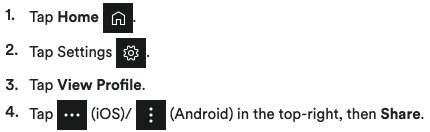


 Paste your Spotify URIs ('spotify:user:username') here, separating them by '//':spotify:user:sedepa//spotify:user:1163173670//spotify:user:119404049//spotify:user:azaba//spotify:user:diegolriveiro//spotify:user:1225636143//spotify:user:1152012320//spotify:user:luisarguel//spotify:user:alvarodiaztort//spotify:user:ycz169eekj80gcmz8jrifxit1//spotify:user:1116864324

            ·················································
            ·················································
            ·················································
            
            José de Pablo , enter the Spotify playlists you would like to upload, separated by '//'. 
                        
            These are all your public playlists: 
    
            ['MAD', 'Sunlight', 'Mana Maoli', 'Talking', 'Chosen one', 'Grandes maestros alemanes del arpa que nacieron en el siglo XX', 'Beatz', 'Interference', 'Movida Milennial', 'Si algún día me convierto en jugador de NBA estos serán mis jams', 


            ·················································
            ·················································
            ·················································
            
            Patricia Estevez , enter the Spotify playlists you would like to upload, separated by '//'. 
                        
            These are all your public playlists: 
    
            ['Roadtrip to Pow Pow', 'new', 'Relax & Unwind', 'Baila Reggaeton', 'fin de año', 'first day of my life (feat. goody grace) – gnash 2', 'first day of my life (feat. goody grace) – gnash', 'De Camino', 'Dinner Lounge', 'Broken Heart', 'Impulso Creativo', 'Café, Libros.', 'mias', '¡Viva Latino!', 'Starred'] 
            
            
            If you want to submit all, just write "all"
                        
            all

            ·················································
            ·················································
            ···································


    ·················································
    ·················································
    ·················································      
            
    
Obtaining tracks info from José de Pablo
Obtaining tracks info from Javier Guijarro Eguinoa
Obtaining tracks info from Nacho FH
Obtaining tracks info from Nacho Azabal
Obtaining tracks info from diegolriveiro
Obtaining tracks info from Patricia Estevez
Obtaining tracks info from Ignacio Siska
Obtaining tracks info from Luis Argüello Mur
Obtaining tracks info from alvarodiaztort
Obtaining tracks info from Rui
Obtaining tracks info from Juanjo P Fdez
Obtaining final tracks from José de Pablo
Obtaining final tracks from Javier Guijarro Eguinoa
Obtaining final tracks from Nacho FH
Obtaining final tracks from Nacho Azabal
Obtaining final tracks from diegolriveiro
Obtaining final tracks from Patricia Estevez
Obtaining final tracks from Ignacio Siska
Obtaining final tracks from Luis Argüello Mur
Obtaining fin

,ID,Track,Artist,Frequency
0,50LqU2nhdE3fmWOuqOjpjz,Suzanne,Leonard Cohen,5
1,0MUh20kYFOG1vN8R6GEAnR,About Today,The National,5
2,75JFxkI2RXiU7L9VXzMkle,The Scientist,Coldplay,5
3,0BgbobvykXxEvxo2HhCuvM,Banana Pancakes,Jack Johnson,5
4,3oU0VH9kbBIYnMvYey1KtB,Demon Host,Timber Timbre,5
5,3AszgPDZd9q0DpDFt4HFBy,Hey Ya!,OutKast,5
6,34a7VkqKRQ4pA2598XizKN,Cucurucu,Nick Mulvey,5
7,5qv0ohJV2QNwga79jLNDYQ,Hallelujah,Jeff Buckley,5
8,5HQVUIKwCEXpe7JIHyY734,"Young, Wild & Free (feat. Bruno Mars)",Snoop Dogg,5
9,16NE62lzGmi6ehGTNVI659,Basic Space,The xx,5



          ·················································
          ·················································
          ·················································
          
          Here's your new combined playlist: 
          
          https://open.spotify.com/playlist/1T3HpP04ZznEDRfpqrp3QE
          
          ENJOY!
          
Elapsed time: 28.002310037612915


In [163]:
if __name__ == '__main__':
    
    users = receive_users()
    
    users_playlists_names_IDs, mygroup, users = get_user_playlists(users)
    
    users_playlists_tracks, mygroup, start_time, users = get_tracks_info(users_playlists_names_IDs, mygroup, users)
    
    final_tracks, final_track_IDs_unique, final_track_IDs, mygroup, start_time = get_final_tracks(users_playlists_tracks, mygroup, start_time, users)
    
    final_track_IDs_unique, mygroup, start_time = create_dataframe(
        final_tracks, final_track_IDs_unique, final_track_IDs, mygroup, start_time)
    
    create_playlist(final_track_IDs_unique, mygroup, start_time)
    